In [15]:
%matplotlib inline

In [16]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
import pickle

**Load the uploaded Boston housing dataset**

In [17]:

file_path = "../data/dataset.csv"
boston_df = pd.read_csv(file_path)

# Show basic information and the first few rows

In [18]:
boston_df.info()
boston_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


clean missing values from the Boston Housing dataset

In [19]:
# Check for missing values in each column
print("Missing values before cleaning:\n", boston_df.isnull().sum())

# Drop rows with any missing values
boston_df_cleaned = boston_df.dropna()

# Confirm all missing values are removed
print("\nMissing values after cleaning:\n", boston_df_cleaned.isnull().sum())

Missing values before cleaning:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Missing values after cleaning:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

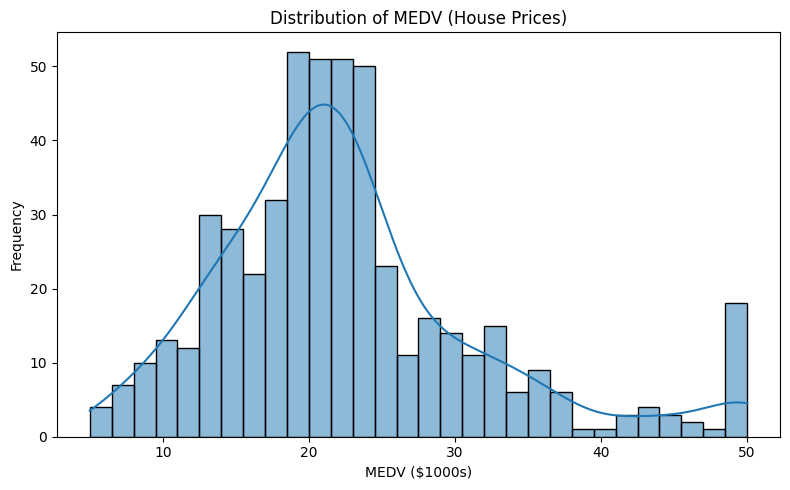

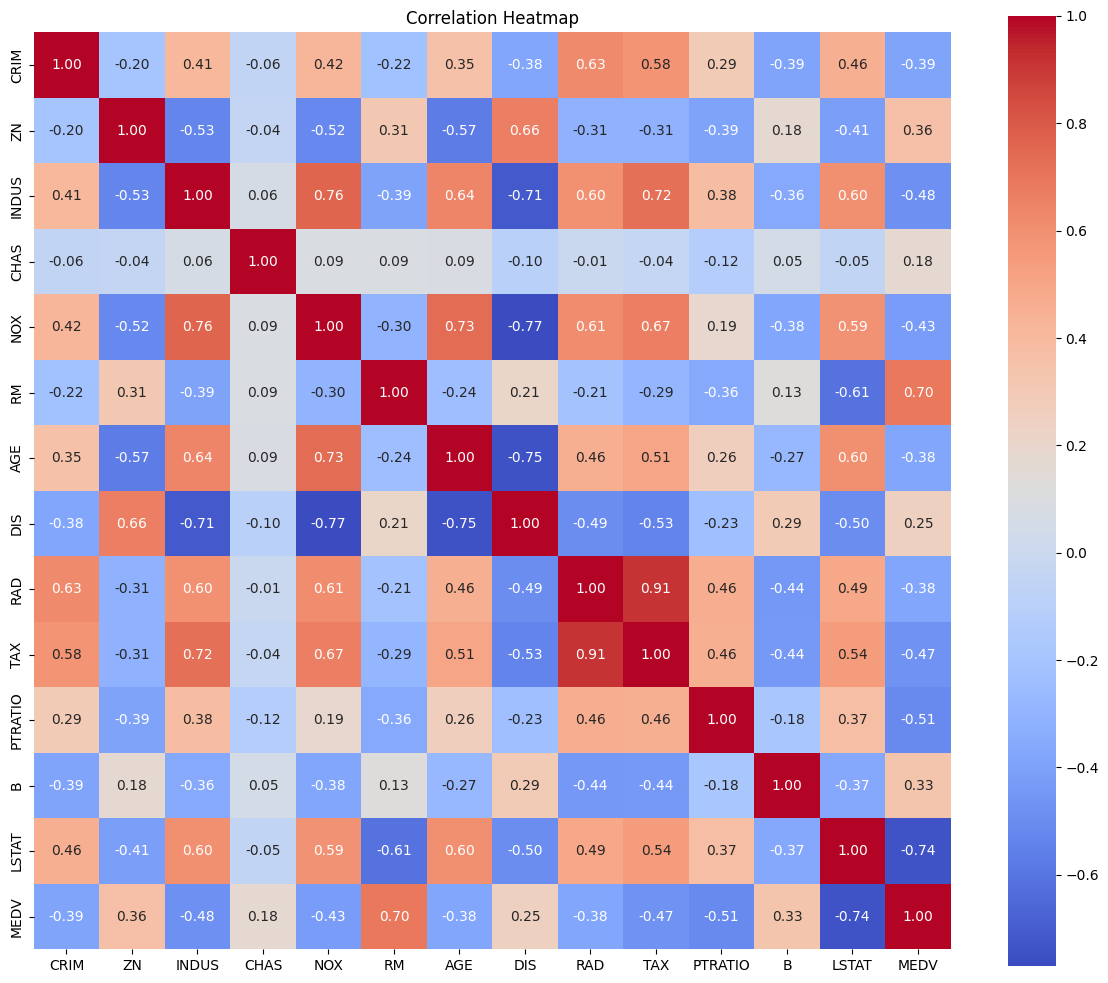

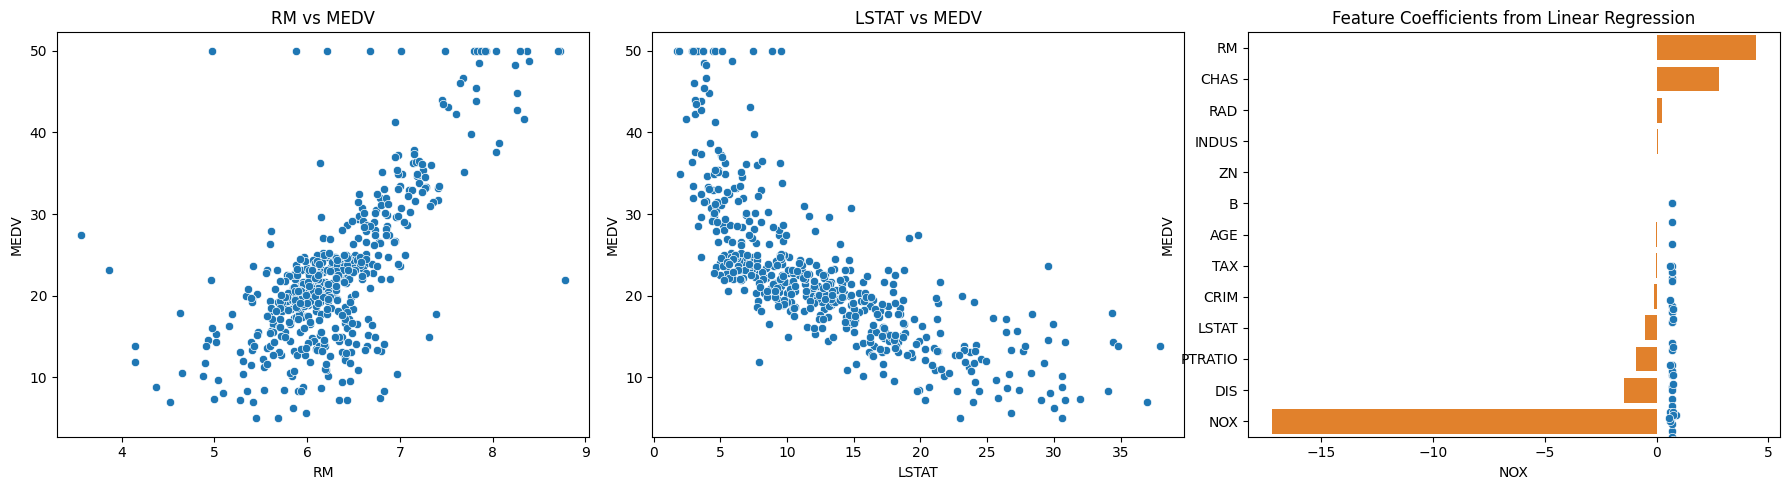

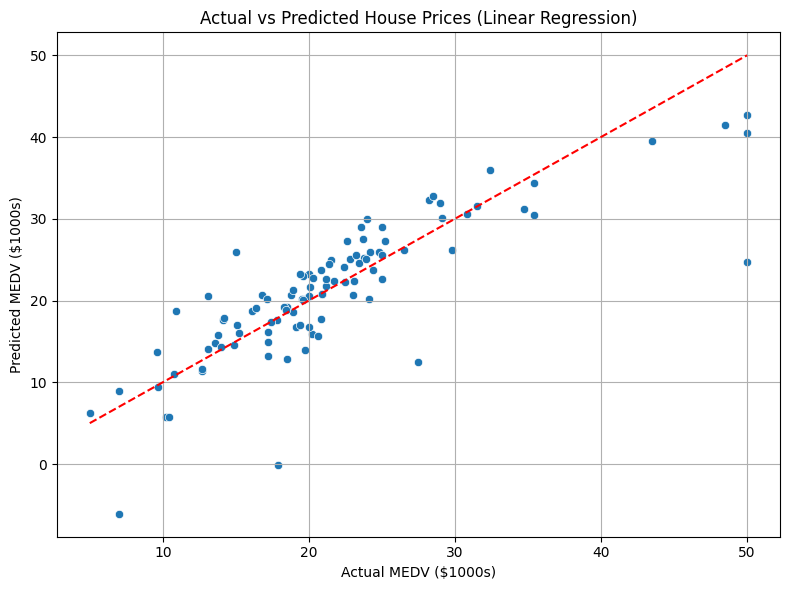

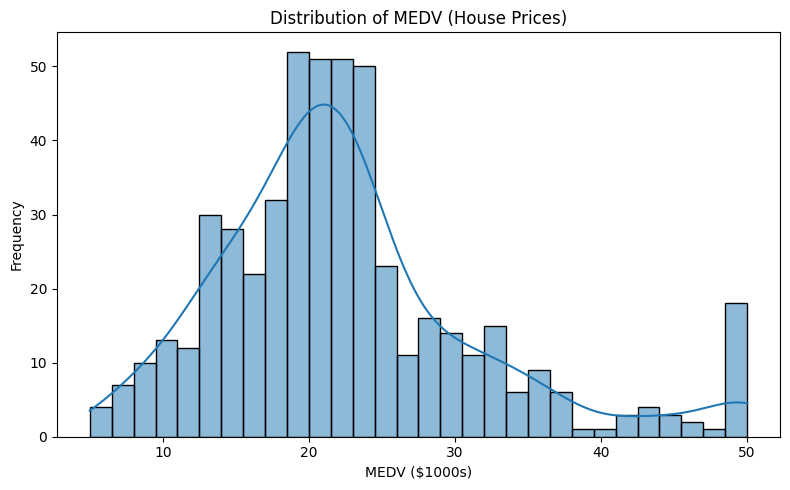

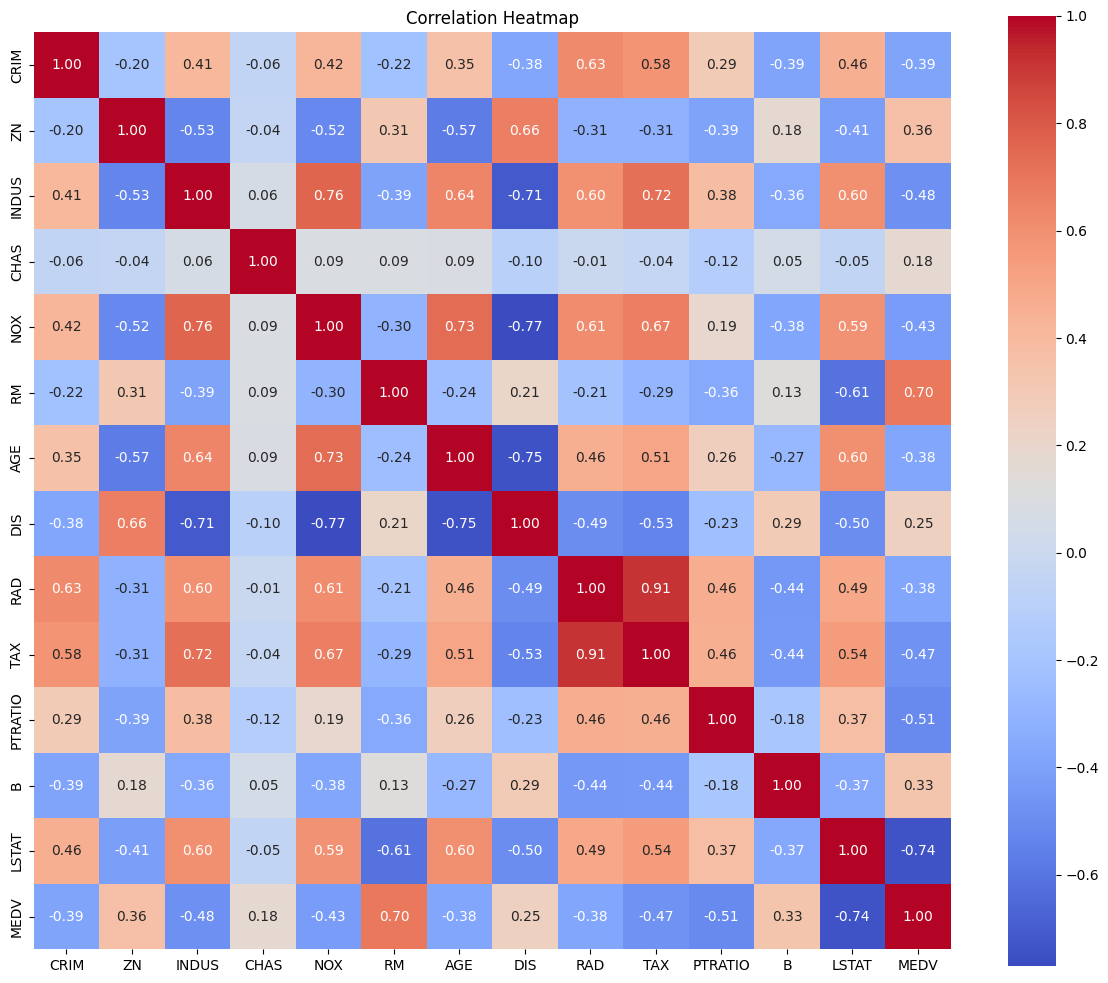

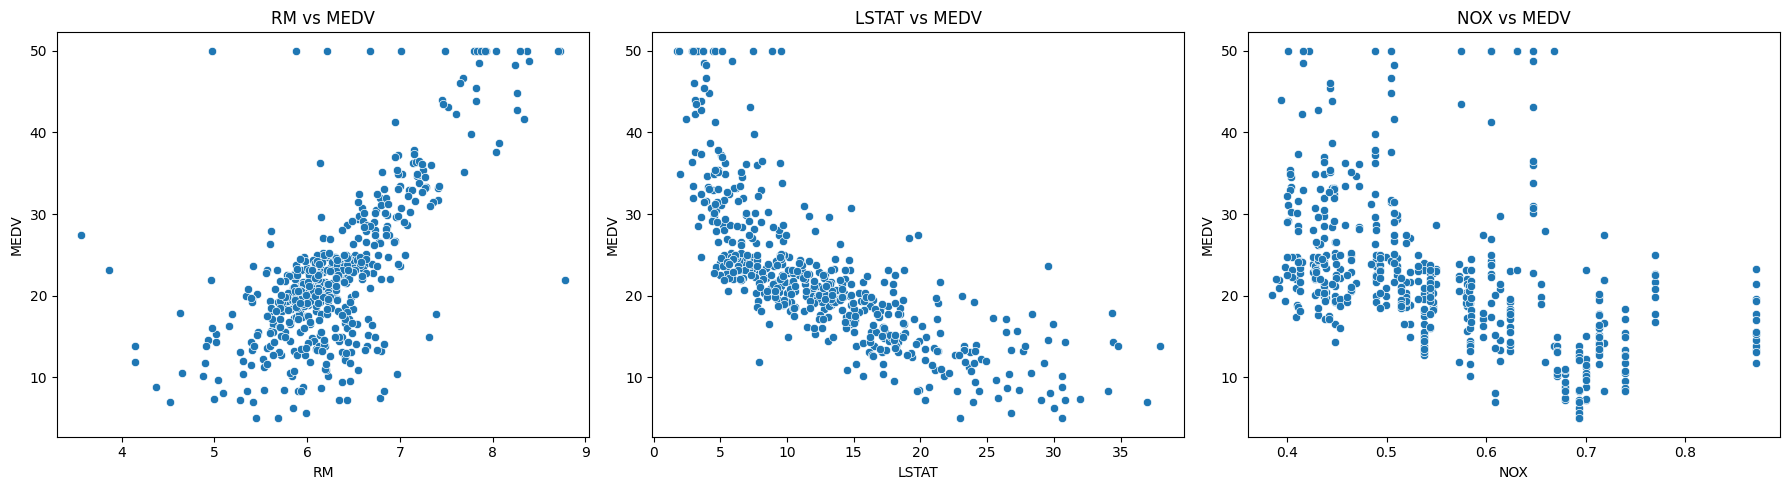

Non-numeric columns: []
Contains infinite values: False


In [20]:

# Rename wrongly named column
boston_df.rename(columns={"NX": "NOX"}, inplace=True)

# Basic stats
print(boston_df.describe())

# Plot 1: Histogram of MEDV (Target)
plt.figure(figsize=(8, 5))
sns.histplot(boston_df["MEDV"], bins=30, kde=True)
plt.title("Distribution of MEDV (House Prices)")
plt.xlabel("MEDV ($1000s)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot 2: Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(boston_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Plot 3: Scatter plots of top 3 correlated features with MEDV
top_features = ["RM", "LSTAT", "NOX"]
plt.figure(figsize=(18, 5))
for i, feature in enumerate(top_features):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=boston_df, x=feature, y="MEDV")
    plt.title(f"{feature} vs MEDV")
    plt.xlabel(feature)
    plt.ylabel("MEDV")
plt.tight_layout()
plt.show()

# Check for non-numeric columns and invalid values
non_numeric_columns = boston_df.select_dtypes(exclude=["number"]).columns.tolist()
has_invalid_values = boston_df.isin([float("inf"), float("-inf")]).any().any()

print("Non-numeric columns:", non_numeric_columns)
print("Contains infinite values:", has_invalid_values)


 **Train-Test Split**

In [21]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = boston_df.drop("MEDV", axis=1)
y = boston_df["MEDV"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print split shapes
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (404, 13)
Testing features shape: (102, 13)
Training target shape: (404,)
Testing target shape: (102,)


 Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

Make Predictions

In [23]:
# Predict on the test set
y_pred = lr_model.predict(X_test)


Evaluate the Model

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print("R² Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Linear Regression Model Evaluation:
R² Score: 0.6687594935356315
Mean Squared Error (MSE): 24.291119474973556
Root Mean Squared Error (RMSE): 4.92860218266534


Coefficients (Feature Importance)

    Feature  Coefficient
5        RM     4.438835
3      CHAS     2.784438
8       RAD     0.262430
2     INDUS     0.040381
1        ZN     0.030110
11        B     0.012351
6       AGE    -0.006296
9       TAX    -0.010647
0      CRIM    -0.113056
12    LSTAT    -0.508571
10  PTRATIO    -0.915456
7       DIS    -1.447865
4       NOX   -17.202633


Text(0.5, 1.0, 'Feature Coefficients from Linear Regression')

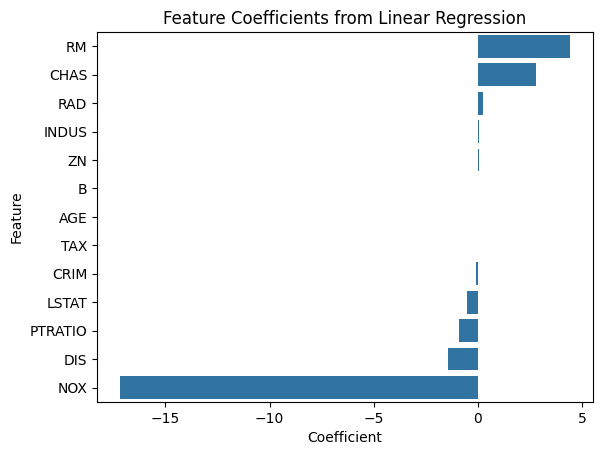

In [25]:
# Print feature coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr_model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)

sns.barplot(data=coefficients, x="Coefficient", y="Feature")
plt.title("Feature Coefficients from Linear Regression")

 Actual vs. Predicted (Linear Regression)
This helps visually assess how well the model predicted house prices.

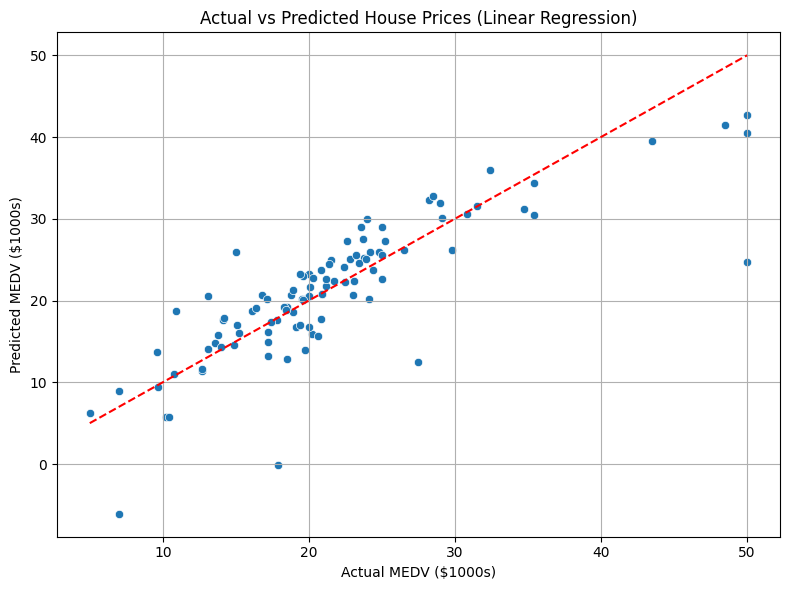

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual MEDV ($1000s)")
plt.ylabel("Predicted MEDV ($1000s)")
plt.title("Actual vs Predicted House Prices (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


 Train a Decision Tree Regressor (Advanced Model)

In [27]:
from sklearn.tree import DecisionTreeRegressor

# Train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
dt_pred = dt_model.predict(X_test)

dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r2 = r2_score(y_test, dt_pred)

print("Decision Tree Model Evaluation:")
print("R² Score:", dt_r2)
print("RMSE:", dt_rmse)


Decision Tree Model Evaluation:
R² Score: 0.8579634380978161
RMSE: 3.2273949915330395


**Train a Random Forest Regressor**

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Model Evaluation:")
print("R² Score:", rf_r2)
print("RMSE:", rf_rmse)


Random Forest Model Evaluation:
R² Score: 0.8922527442109116
RMSE: 2.8109631609391226
